In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score,mean_squared_error as mse
from scipy.stats import zscore

In [6]:
scaler = MinMaxScaler()

In [7]:
df = pd.read_csv("uber.csv")

In [8]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
(df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
(df.pickup_longitude<180) & (df.dropoff_longitude<180) &
(df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

In [12]:
def dist(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r

df['distance'] = dist(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

df.drop(['pickup_datetime','Unnamed: 0','key'],axis=1,inplace=True)

In [13]:
for col in df.columns:
    df[col] = scaler.fit_transform(df[[col]])

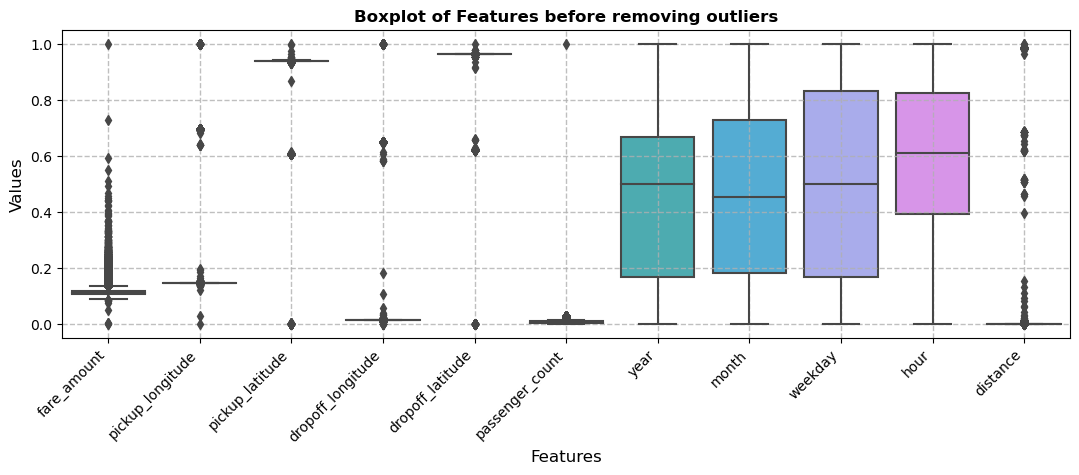

In [14]:
plt.figure(figsize=(13,4))
sns.boxplot(data=df)
plt.title('Boxplot of Features before removing outliers', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(ticks=range(len(df.columns)), labels=df.columns, rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=1, alpha=0.8)

In [15]:
temp=df.copy()

In [16]:
for i in temp.columns:
    Q1 = temp[i].quantile(0.25)
    Q3 = temp[i].quantile(0.75)
    IQR = Q3 - Q1
    temp = temp[temp[i] <= (Q3+(1.5*IQR))]
    temp = temp[temp[i] >= (Q1-(1.5*IQR))]
    temp = temp.reset_index(drop=True)

In [17]:
for col in temp.columns:
    temp[col] = scaler.fit_transform(temp[[col]])

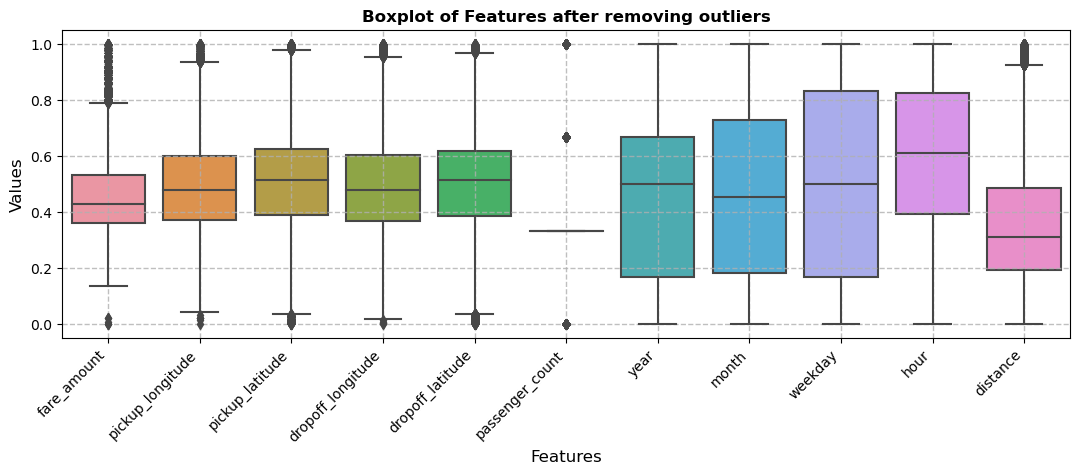

In [18]:
plt.figure(figsize=(13,4))
sns.boxplot(data=temp)
plt.title('Boxplot of Features after removing outliers', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(ticks=range(len(temp.columns)), labels=temp.columns, rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=1, alpha=0.8)


In [19]:
df = temp

Text(0.5, 1.0, 'Correlation Heatmap of Features in the Dataset')

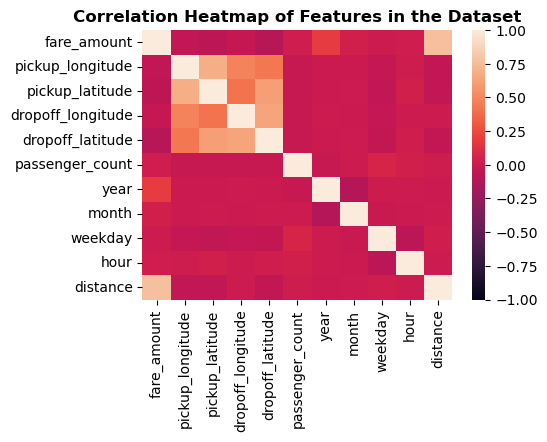

In [20]:
plt.figure(figsize=(5,3.5))
sns.heatmap(df.corr(),vmax=1,vmin=-1)
plt.title("Correlation Heatmap of Features in the Dataset", fontsize=12, fontweight='bold')

In [21]:
x=df.drop('fare_amount',axis=1)
y=df['fare_amount']

In [22]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.2)

In [23]:
le = LinearRegression()
le.fit(xtrain,ytrain)
le_ypred = pd.DataFrame(le.predict(xtest))

In [24]:
le_r2 = r2_score(ytest,le_ypred)
le_rmse = np.sqrt(mse(ytest,le_ypred))

In [25]:
print("R2 Score of Linear Regression: ",le_r2)
print("RMSE Score of Linear Regression: ",le_rmse)

R2 Score of Linear Regression:  0.6300595545403129
RMSE Score of Linear Regression:  0.08312685300128803


In [ ]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
rf_ypred = pd.DataFrame(rf.predict(xtest))

In [ ]:
rf_r2 = r2_score(ytest,rf_ypred)
rf_rmse = np.sqrt(mse(ytest,rf_ypred))

In [ ]:
print("R2 Score of Random Forest Regression: ",rf_r2)
print("RMSE Score of Random Forest Regression: ",rf_rmse)